<a href="https://colab.research.google.com/github/R-Amelia/Data-visualization/blob/main/Deloitte%20x%20Myskill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sales_data.csv')

In [6]:
# Hitunglah total revenue dari setiap Item
total_revenue = df.groupby('Product')['Revenue'].sum()
print(total_revenue)

Product
AWC Logo Cap                  549220
All-Purpose Bike Stand        342664
Bike Wash - Dissolver         198745
Classic Vest, L               268943
Classic Vest, M               278764
                               ...  
Touring-3000 Yellow, 62        56634
Water Bottle - 30 oz.         746015
Women's Mountain Shorts, L    484179
Women's Mountain Shorts, M    663155
Women's Mountain Shorts, S    596287
Name: Revenue, Length: 130, dtype: int64


In [7]:
# Menghitung Profit Margin
df['Profit Margin'] = df['Profit'] / df['Revenue']
# Filter order dengan profit margin > 0.2
filtered_orders = df[df['Profit Margin'] > 0.2]
print(filtered_orders)

              Date  Day     Month  Year  Customer_Age       Age_Group  \
0       2013-11-26   26  November  2013            19     Youth (<25)   
1       2015-11-26   26  November  2015            19     Youth (<25)   
2       2014-03-23   23     March  2014            49  Adults (35-64)   
3       2016-03-23   23     March  2016            49  Adults (35-64)   
4       2014-05-15   15       May  2014            47  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113031  2016-04-12   12     April  2016            41  Adults (35-64)   
113032  2014-04-02    2     April  2014            18     Youth (<25)   
113033  2016-04-02    2     April  2016            18     Youth (<25)   
113034  2014-03-04    4     March  2014            37  Adults (35-64)   
113035  2016-03-04    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0                    M          Canada  Britis

In [9]:
# Identifikasi produk dengan profit margin < 0.1
df['Discount Applied'] = df['Profit Margin'] < 0.1
# Terapkan diskon 10% pada produk dengan profit margin < 0.1
df.loc[df['Profit Margin'] < 0.1, 'Discounted Revenue'] = df['Revenue'] * 0.9
print(df[df['Profit Margin'] < 0.1])

             Date  Day     Month  Year  Customer_Age       Age_Group  \
16926  2013-11-24   24  November  2013            51  Adults (35-64)   
16927  2015-11-24   24  November  2015            51  Adults (35-64)   
16928  2014-02-05    5  February  2014            51  Adults (35-64)   
16929  2016-02-05    5  February  2016            51  Adults (35-64)   
16930  2014-05-12   12       May  2014            50  Adults (35-64)   
...           ...  ...       ...   ...           ...             ...   
49299  2015-11-06    6  November  2015            21     Youth (<25)   
49300  2014-03-19   19     March  2014            21     Youth (<25)   
49301  2016-03-19   19     March  2016            21     Youth (<25)   
49302  2014-04-16   16     April  2014            21     Youth (<25)   
49303  2016-04-16   16     April  2016            21     Youth (<25)   

      Customer_Gender    Country            State Product_Category  ...  \
16926               M  Australia         Victoria         Cl

In [12]:
# Menghitung total sales per kategori
sales_per_category = df.groupby('Product_Category')['Order_Quantity'].sum()
print(sales_per_category)

Product_Category
Accessories    1054162
Bikes            36411
Clothing        254743
Name: Order_Quantity, dtype: int64


In [29]:
# Group data by 'Customer Age Group' and calculate the average revenue for each group
avg_revenue_by_age = df.groupby('Age_Group')['Revenue'].mean()
print("Rata-rata revenue per kelompok usia:\n", avg_revenue_by_age)

Rata-rata revenue per kelompok usia:
 Age_Group
Adults (35-64)          762.828765
Seniors (64+)           421.975342
Young Adults (25-34)    793.077405
Youth (<25)             657.572302
Name: Revenue, dtype: float64


In [32]:
# Menyimpan data ke file CSV
filtered_orders.to_csv('sales_data_2023.csv', index=False)
# Menyimpan data ke file Excel
filtered_orders.to_excel('sales_data_2023.xlsx', index=False)
print(df.head())

         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category  ...  \
0               M     Canada  British Columbia      Accessories  ...   
1               M     Canada  British Columbia      Accessories  ...   
2               M  Australia   New South Wales      Accessories  ...   
3               M  Australia   New South Wales      Accessories  ...   
4               F  Australia   New South Wales      Accessories  ...   

               Product Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike              8         45         120     590   360   
1 

In [34]:
import matplotlib.pyplot as plt

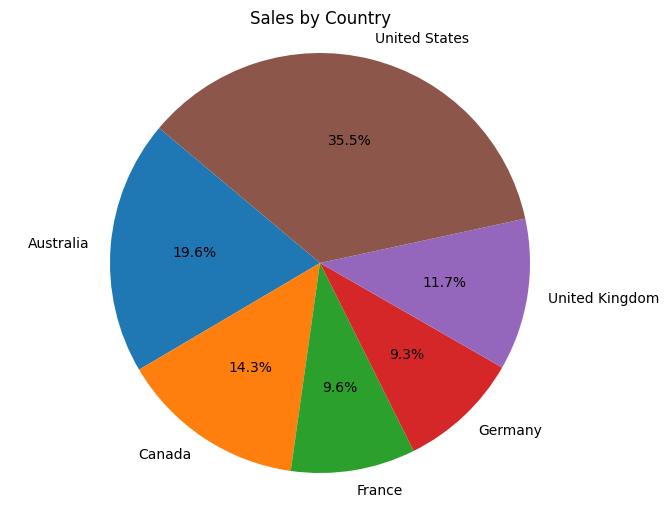

In [36]:
# Assuming df is your DataFrame and it has a 'Country' column
sales_by_country = df.groupby('Country')['Order_Quantity'].sum()

# Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sales_by_country, labels=sales_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('sales_by_country_pie_chart.png')
plt.show()

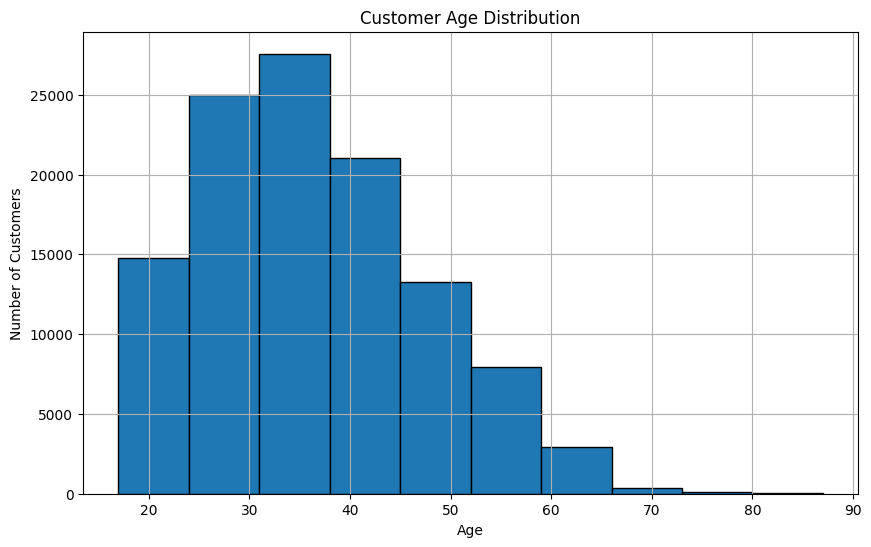

In [38]:
# Membuat Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Customer_Age'], bins=10, edgecolor='black') # Changed 'Customer Age' to 'Customer_Age'
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
# Menyimpan Histogram ke file
plt.savefig('customer_age_distribution_histogram.png')
plt.show()

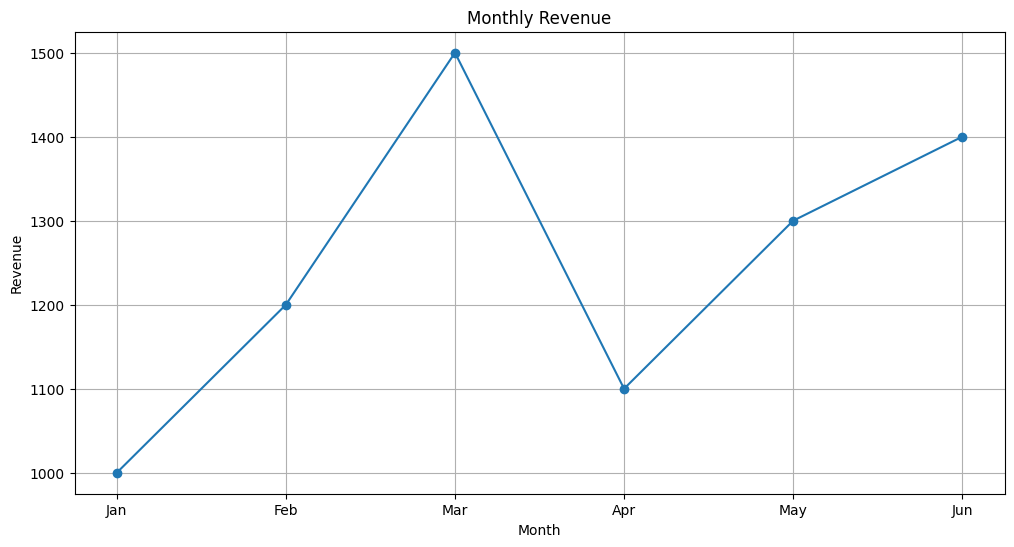

In [41]:
# Membuat Visualisasi
plt.figure(figsize=(12, 6))
# Create sample data for monthly_revenue - replace this with your actual data loading or calculation
monthly_revenue = pd.DataFrame({'Total': [1000, 1200, 1500, 1100, 1300, 1400]}, index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.plot(monthly_revenue.index, monthly_revenue['Total'], marker='o') # Changed 'Revenue' to 'Total'
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
# Menyimpan Visualisasi ke file
plt.savefig('monthly_revenue.png')
plt.show()